In [54]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
batch_size = 128
learning_rate = 0.0005
num_epoch = 10
hidden_size = 50
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [56]:
mnist_train = dset.MNIST("../", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST("../", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

In [57]:
train_loader = torch.utils.data.DataLoader(mnist_train,batch_size=batch_size, shuffle=True,num_workers=2,drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test,batch_size=batch_size, shuffle=False,num_workers=2,drop_last=True)

In [58]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder,self).__init__()
        self.fc1_1 = nn.Linear(784, hidden_size)
        self.fc1_2 = nn.Linear(784, hidden_size)
        self.relu = nn.ReLU()
                        
    def encode(self,x):
        x = x.view(batch_size,-1)
        mu = self.relu(self.fc1_1(x))
        log_var = self.relu(self.fc1_2(x))
                
        return mu,log_var
    
    def reparametrize(self, mu, logvar):
        std = logvar.mul(0.5).exp_()
        
        eps = torch.FloatTensor(std.size()).normal_()
        eps = Variable(eps).to(device)
        
        return eps.mul(std).add_(mu)
    
    def forward(self,x):
        mu, logvar = self.encode(x)
        reparam = self.reparametrize(mu,logvar)
        
        return mu,logvar,reparam
        
encoder = Encoder().to(device)

In [59]:
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder,self).__init__()
        self.fc1 = nn.Linear(hidden_size, 784)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self,x):
        out = self.fc1(x)
        out = self.sigmoid(out)
        out = out.view(batch_size,1,28,28)
        
        return out
        
decoder = Decoder().to(device)

In [60]:
reconstruction_function = nn.BCELoss(size_average=False)

def loss_function(recon_x, x, mu, logvar):
    print(recon_x.shape,x.shape)
    BCE = reconstruction_function(recon_x, x)

    # see Appendix B from VAE paper:
    # Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
    # https://arxiv.org/abs/1312.6114
    # 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    KLD_element = mu.pow(2).add_(logvar.exp()).mul_(-1).add_(1).add_(logvar)
    KLD = torch.sum(KLD_element).mul_(-0.5)

    return BCE + KLD

parameters = list(encoder.parameters())+ list(decoder.parameters())
optimizer = torch.optim.Adam(parameters, lr=learning_rate)

In [62]:
try:
    encoder, decoder = torch.load('./model/variational_autoencoder.pkl')
    print("\n--------model restored--------\n")
except:
    print("\n--------model not restored--------\n")
    pass

for i in range(num_epoch):
    for j,[image,label] in enumerate(train_loader):
        optimizer.zero_grad()
        
        image = Variable(image).to(device)
        
        mu,log_var,reparam = encoder(image)
        output = decoder(reparam)
        
        loss = loss_function(output, image, mu, log_var)
        
        loss.backward()
        optimizer.step()

        if j % 100 == 0:
            torch.save([encoder,decoder],'./variational_autoencoder.pkl')
            print(loss)


--------model not restored--------

torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
tensor(73752.0938, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 2

torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([12

torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([12

torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([12

torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([12

torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
tensor(24657.9688, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) 

torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
tensor(23677.0723, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) 

torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([12

torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
tensor(23128.3047, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) 

torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
tensor(23101.9277, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) 

torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([12

torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([12

torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([12

torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
tensor(22243.8574, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) 

torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([12

torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([12

torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([12

torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([12

torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([12

torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([12

torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([12

torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([12

torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
tensor(21729.7070, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) 

torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([12

torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
tensor(20995.5391, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) 

torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([12

torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([12

torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([12

torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([12

torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([12

torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28]) torch.Size([128, 1, 28, 28])
torch.Size([12

torch.Size([128, 28, 28])


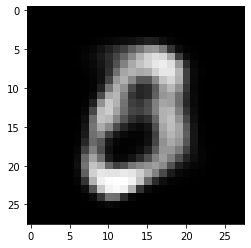

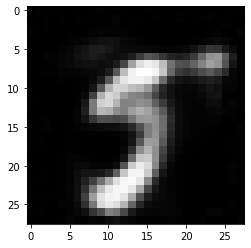

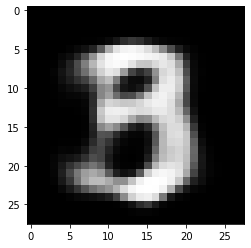

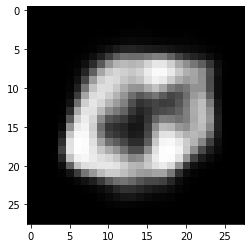

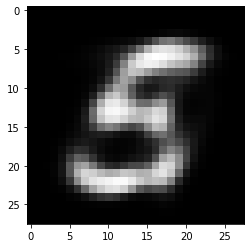

In [63]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(5):
    #plt.imshow(torch.squeeze(image[i]).numpy(),cmap='gray')
    #plt.show()
    plt.imshow(out_img[i].numpy(),cmap='gray')
    plt.show()

In [64]:
for i in range(1):
    for j,[image,label] in enumerate(test_loader):
       
        image = Variable(image,volatile=True).to(device)
        output,mean,var = encoder(image)
        output = decoder(output)
        
    if j % 10 == 0:
        print(loss)

<ipython-input-64-202e53f63ae4>:4: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image,volatile=True).to(device)


torch.Size([128, 28, 28])


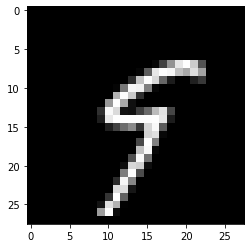

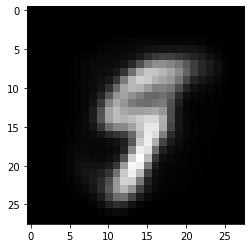

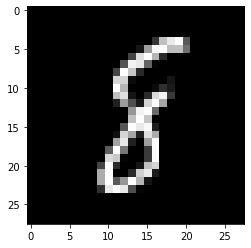

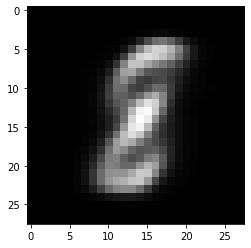

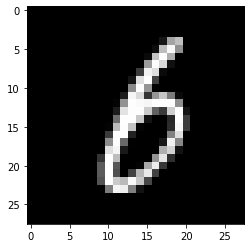

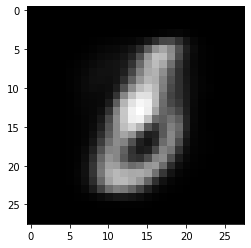

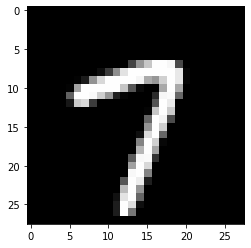

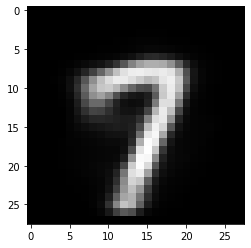

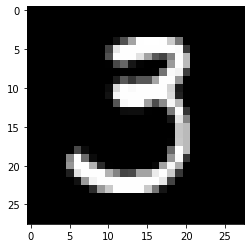

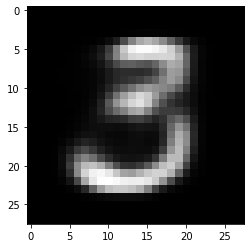

In [65]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(5):
    plt.imshow(torch.squeeze(image[i].cpu()).data.numpy(),cmap='gray')
    plt.show()
    plt.imshow(out_img[i].numpy(),cmap='gray')
    plt.show()